<a href="https://colab.research.google.com/github/OguzCanTosun/Python-Projects/blob/main/Python_ile_K%C3%B6t%C3%BC_S%C3%B6z_Tespit_Etme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model_yolu = '/content/drive/MyDrive/Colab Notebooks/kotusoz.joblib'
veri_yolu = '/content/drive/MyDrive/Colab Notebooks/train.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical
from keras import backend as K

data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


##Veri İşlemesi

In [ ]:
# dataset shape to know how many tweets in the datasets
print(f"num of tweets: {data.shape}")

# extract the text and labels
tweet = list(data['tweet'])
labels = list(data['class'])

num of tweets: (24783, 6)


In [ ]:
# Initialize the stopwords
stop_words = stopwords.words('english')

# html'leri kaldırmak için
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

# kullanıcı etiketlerini değiştirmek için
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "user", raw_text)

    return text

# url'leri kaldırmak için
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)

    return text

# gereksiz sembolleri kaldırmak için
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')

    return text

# stopwords'leri kaldırmak için
def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = " ".join(text)

    return text

## Bu fonksiyon, yukarıdaki tüm fonksiyonları kullanarak tüm veri kümesini temizlemek için kullanılır
def preprocess(datas):
    clean = []
    # xxx'i "kullanıcı" olarak değiştir
    clean = [change_user(text) for text in datas]
    # emojileri kaldırmak için
    clean = [remove_entity(text) for text in clean]
    # url'leri kaldırmak için
    clean = [remove_url(text) for text in clean]
    # sondaki şeyleri kaldır
    clean = [remove_noise_symbols(text) for text in clean]
    # stopwords'leri kaldırmak için
    clean = [remove_stopwords(text) for text in clean]

    return clean

In [ ]:
import nltk
nltk.download('punkt')
# temizleme işlevini çağırma
clean_tweet = preprocess(tweet)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clean_tweet, labels, test_size=0.2, random_state=42)

##Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
# kelime dağarcığı boyutu
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
max_length = max(len(seq) for seq in X_train)

for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

In [ ]:
y_test = to_categorical(y_test, num_classes=3)
y_train = to_categorical(y_train, num_classes=3)

In [ ]:
print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [ ]:
output_dim = 200


model = Sequential([
    Embedding(vocab_size, output_dim, input_length=max_length),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax"),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1,precision, recall])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 26, 200)           3734200   
                                                                 
 lstm_1 (LSTM)               (None, 64)                67840     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 3810747 (14.54 MB)
Trainable params: 381

##Model Eğitimi

In [ ]:
model_history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
310/310 [==============================] - 57s 147ms/step - loss: 0.4705 - accuracy: 0.8411 - f1: 0.8131 - precision: 0.8443 - recall: 0.7903 - val_loss: 0.3260 - val_accuracy: 0.8876 - val_f1: 0.8890 - val_precision: 0.9031 - val_recall: 0.8755
Epoch 2/10
310/310 [==============================] - 38s 123ms/step - loss: 0.2411 - accuracy: 0.9192 - f1: 0.9190 - precision: 0.9301 - recall: 0.9083 - val_loss: 0.3346 - val_accuracy: 0.8796 - val_f1: 0.8812 - val_precision: 0.8894 - val_recall: 0.8733
Epoch 3/10
310/310 [==============================] - 41s 132ms/step - loss: 0.1546 - accuracy: 0.9458 - f1: 0.9456 - precision: 0.9496 - recall: 0.9416 - val_loss: 0.4439 - val_accuracy: 0.8656 - val_f1: 0.8670 - val_precision: 0.8703 - val_recall: 0.8637
Epoch 4/10
310/310 [==============================] - 39s 127ms/step - loss: 0.1068 - accuracy: 0.9610 - f1: 0.9611 - precision: 0.9628 - recall: 0.9594 - val_loss: 0.4385 - val_accuracy: 0.8689 - val_f1: 0.8696 - val_precision: 

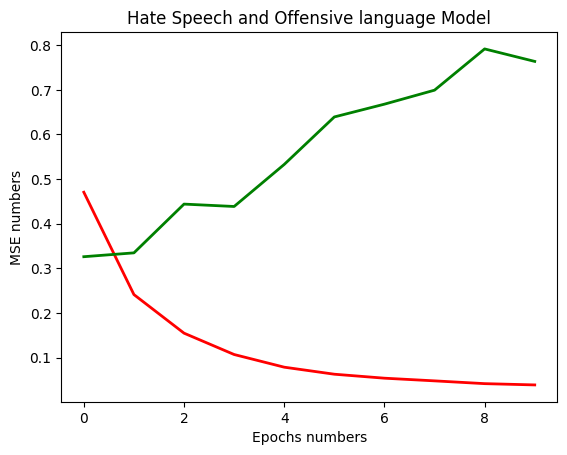

In [ ]:
import matplotlib.pyplot as plt
hist = model.history.history
plt.plot(hist['loss'],'r',linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('Nefret Söylemi ve Saldırgan Dil Modeli')
plt.xlabel('Epochs sayıları')
plt.ylabel('MSE sayıları')
plt.show()

##Model Kayıt

In [ ]:
model_yolu = '/content/drive/MyDrive/Colab Notebooks/kotusoz.joblib'
model.save(model_yolu)

##Gerçek Zamanlı Test

In [ ]:
!pip install joblib
!pip install colorama
import tensorflow as tf
import joblib
from colorama import Fore, Back, Style

#model = tf.keras.models.load_model(model_yolu)

In [ ]:
while True:
  giris = input("Lütfen cümlenizi giriniz: ")
  kelime = tokenizer.texts_to_sequences([giris])
  kelimeUzunluk = pad_sequences(kelime, maxlen=max_length)
  tahmin = model.predict(kelimeUzunluk)
  if np.argmax(tahmin) == 1:
    print(Fore.RED, 'Bu cümlede kötü kelime veya kelimeler bulunmaktadır.')
  else:
    print(Fore.GREEN, 'Bu cümlede kötü kelime veya kelimeler bulunmamaktadır.')
  print(Fore.WHITE, 'Doğruluk puanı: ',tahmin[0][np.argmax(tahmin)])

Lütfen cümlenizi giriniz: ı m a computer engineer
1/1 [==============================] - 0s 382ms/step
 Bu cümlede kötü kelime veya kelimeler bulunmamaktadır.
 Doğruluk puanı:  0.9999845
Lütfen cümlenizi giriniz: ı think thats good idea
1/1 [==============================] - 0s 24ms/step
 Bu cümlede kötü kelime veya kelimeler bulunmamaktadır.
 Doğruluk puanı:  0.97495323
Lütfen cümlenizi giriniz: fuck that ı m leaving
1/1 [==============================] - 0s 34ms/step
 Bu cümlede kötü kelime veya kelimeler bulunmaktadır.
 Doğruluk puanı:  0.9999968


KeyboardInterrupt: Interrupted by user